# Chicago Traffic Crashes
## Azamat Kabylbay
### Dataset from: *https://catalog.data.gov/dataset/traffic-crashes-crashes*

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

df = pd.read_csv('Traffic_Crashes.csv')
df

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783694,f2c0204e5392ff379e5804ad25fad66304949d517327c6...,NaN,10/18/2020 12:03:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,4.0,0.0,0,1,10,41.776184,-87.703219,POINT (-87.703218946422 41.776183637489)
783695,5ee5d998db696abf1c85925f71d82015adb33f3b2cdad1...,NaN,06/30/2023 09:37:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,0.0,0.0,21,6,6,41.756217,-87.641596,POINT (-87.641596011467 41.756217389831)
783696,cb0ca76762ca65feacb1f6513312f96f2a05629bd8a866...,NaN,06/01/2020 03:23:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,...,1.0,0.0,1.0,0.0,15,2,6,41.808860,-87.606403,POINT (-87.60640264079 41.808860140425)
783697,cea9e897c768f47b97c73685c1a2b3fdcdcd8809a0517a...,NaN,07/05/2019 03:50:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO FRONT,PARKING LOT,...,0.0,0.0,2.0,0.0,3,6,7,41.787127,-87.645488,POINT (-87.645487943954 41.787127441561)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783699 entries, 0 to 783698
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                783699 non-null  object 
 1   CRASH_DATE_EST_I               58847 non-null   object 
 2   CRASH_DATE                     783699 non-null  object 
 3   POSTED_SPEED_LIMIT             783699 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         783699 non-null  object 
 5   DEVICE_CONDITION               783699 non-null  object 
 6   WEATHER_CONDITION              783699 non-null  object 
 7   LIGHTING_CONDITION             783699 non-null  object 
 8   FIRST_CRASH_TYPE               783699 non-null  object 
 9   TRAFFICWAY_TYPE                783699 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      783699 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [4]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

In [5]:
df.describe()

,CRASH_DATE,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,783699,783699.000000,1.990060e+05,783699.000000,783694.000000,783699.000000,781983.000000,781983.000000,781983.000000,781983.000000,781983.000000,781983.000000,781983.0,783699.000000,783699.000000,783699.000000,778423.000000,778423.000000
mean,2020-04-01 22:07:43.490600704,28.397705,1.333032e+01,3686.356580,1242.746497,2.034901,0.189035,0.001192,0.020077,0.106834,0.060932,2.004563,0.0,13.205054,4.122895,6.722589,41.854746,-87.673351
min,2013-03-03 16:48:00,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,2018-06-29 16:00:00,30.000000,2.000000e+00,1246.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782425,-87.721679
50%,2020-02-28 16:38:00,30.000000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874739,-87.674056
75%,2022-02-15 13:09:30,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924287,-87.633300
max,2023-11-26 00:46:00,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000
std,NaN,6.189507,2.961623e+03,2888.002519,705.294092,0.452472,0.564962,0.037419,0.165933,0.421622,0.317665,1.159156,0.0,5.565968,1.980008,3.374363,0.339767,0.691009


In [6]:
df.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 724852
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         584693
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       22799
CRASH_TYPE                            0
INTERSECTION_RELATED_I           604184
NOT_RIGHT_OF_WAY_I               747429
HIT_AND_RUN_I                    538819
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [7]:
# Set the threshold for null values
threshold = 100000

# Drop columns with null values exceeding the threshold
df = df.dropna(axis=1, thresh=df.shape[0] - threshold)


In [ ]:
df.columns

In [8]:
# List of columns to drop
columns_to_drop = ['CRASH_RECORD_ID', 'ALIGNMENT', 'ROAD_DEFECT', 'REPORT_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION'
]

# Drop the specified columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)

C:\Users\303\AppData\Local\Temp\ipykernel_3396\4070474072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [9]:
df.head()

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
       'CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [10]:
df.isnull().sum()

CRASH_DATE                    0
POSTED_SPEED_LIMIT            0
TRAFFIC_CONTROL_DEVICE        0
DEVICE_CONDITION              0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
TRAFFICWAY_TYPE               0
ROADWAY_SURFACE_COND          0
CRASH_TYPE                    0
PRIM_CONTRIBUTORY_CAUSE       0
LATITUDE                   5276
LONGITUDE                  5276
dtype: int64

In [11]:
df.dropna(inplace=True)

C:\Users\303\AppData\Local\Temp\ipykernel_3396\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [12]:
df = df[df['CRASH_DATE'].dt.year >= 2018]

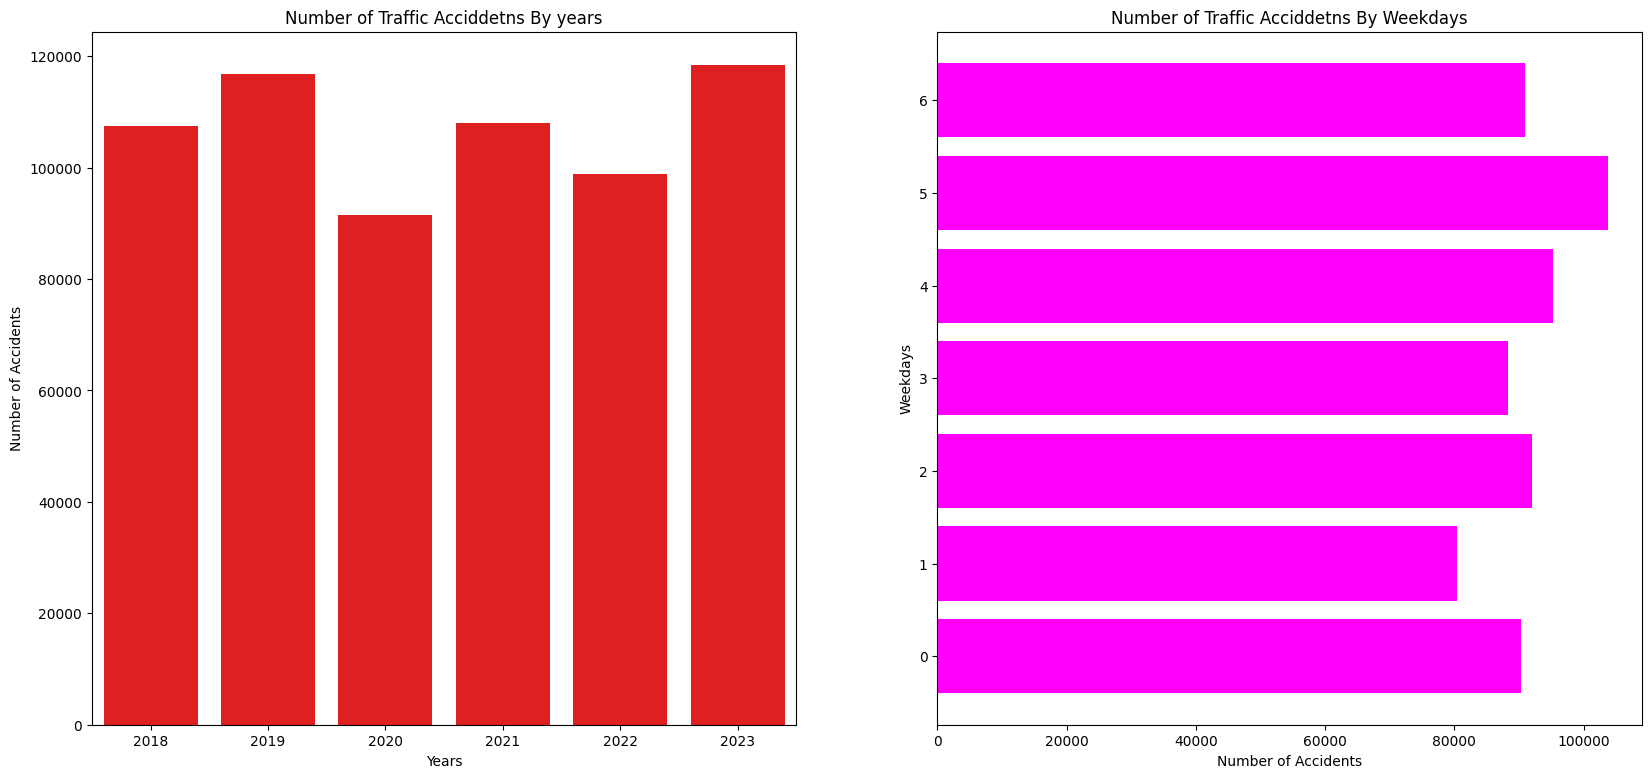

In [13]:
# df['Year'] = df['CRASH_DATE'].dt.year
year = df['CRASH_DATE'].dt.year.value_counts() 

years = df['CRASH_DATE'].dt.year.unique()
num = year.values

week = df['CRASH_DATE'].dt.dayofweek.value_counts()
week
weeks = df['CRASH_DATE'].dt.dayofweek.unique()
numw = week.values

plt.figure(figsize = (20,9),facecolor='White')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num, color="red")
plt.ylabel("Number of Accidents")
plt.xlabel("Years")

plt.title("Number of Traffic Acciddetns By years")

plt.subplot(1, 2, 2)

plt.barh(weeks,numw,color="fuchsia")
plt.title("Number of Traffic Acciddetns By Weekdays")
plt.xlabel("Number of Accidents")
plt.ylabel("Weekdays")
plt.show()

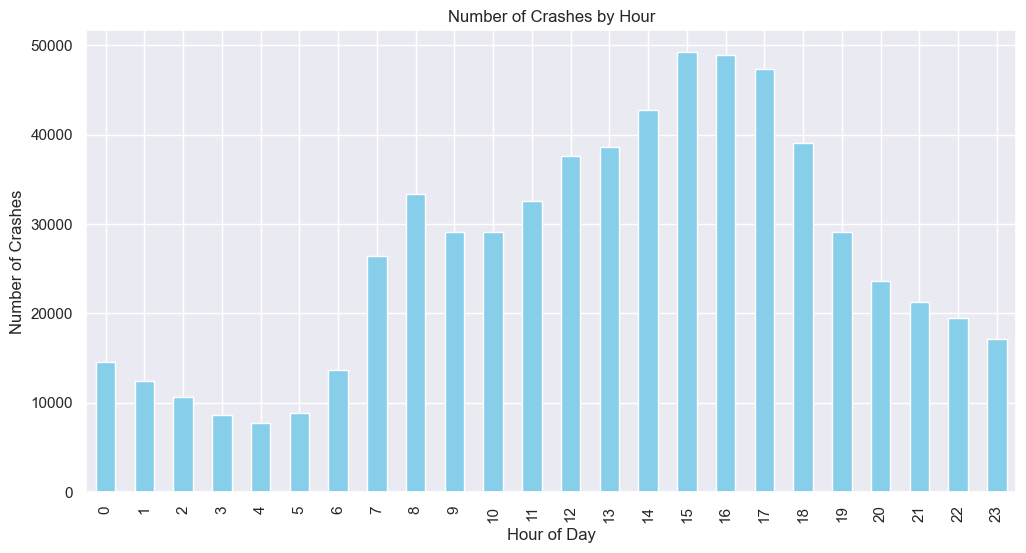

In [41]:
# Count the number of crashes by hour
crashes_by_hour = df['Hour'].value_counts().sort_index()

# Plot the number of crashes by hour
plt.figure(figsize=(12, 6))
crashes_by_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.show()

In [ ]:
# Assuming 'LATITUDE' and 'LONGITUDE' are the columns containing location information
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Create a folium map centered around the mean latitude and longitude
map_center = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()]
crash_map = folium.Map(location=map_center, zoom_start=10)

# Create a MarkerCluster to group markers
marker_cluster = MarkerCluster().add_to(crash_map)

# Add markers for each crash location to the cluster
for index, row in df.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(marker_cluster)


C:\Users\303\AppData\Local\Temp\ipykernel_11572\2614405542.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\303\AppData\Local\Temp\ipykernel_11572\2614405542.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df['PRIM_CONTRIBUTORY_CAUSE'].unique()

array(['FAILING TO REDUCE SPEED TO AVOID CRASH', 'UNABLE TO DETERMINE',
       'IMPROPER BACKING', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'IMPROPER TURNING/NO SIGNAL', 'IMPROPER LANE USAGE',
       'IMPROPER OVERTAKING/PASSING', 'NOT APPLICABLE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'WEATHER',
       'DISREGARDING OTHER TRAFFIC SIGNS',
       'DRIVING ON WRONG SIDE/WRONG WAY', 'FOLLOWING TOO CLOSELY',
       'DISTRACTION - FROM INSIDE VEHICLE', 'ANIMAL', 'TEXTING',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'DISREGARDING TRAFFIC SIGNALS', 'EQUIPMENT - VEHICLE CONDITION',
       'DISREGARDING STOP SIGN',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'ROAD CONSTRUCTION/MAINTENANCE',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'PHYSICAL CONDITION OF DRIVER', 'DISREGARDING YIELD SIGN',
       'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 'TURNING RIGH

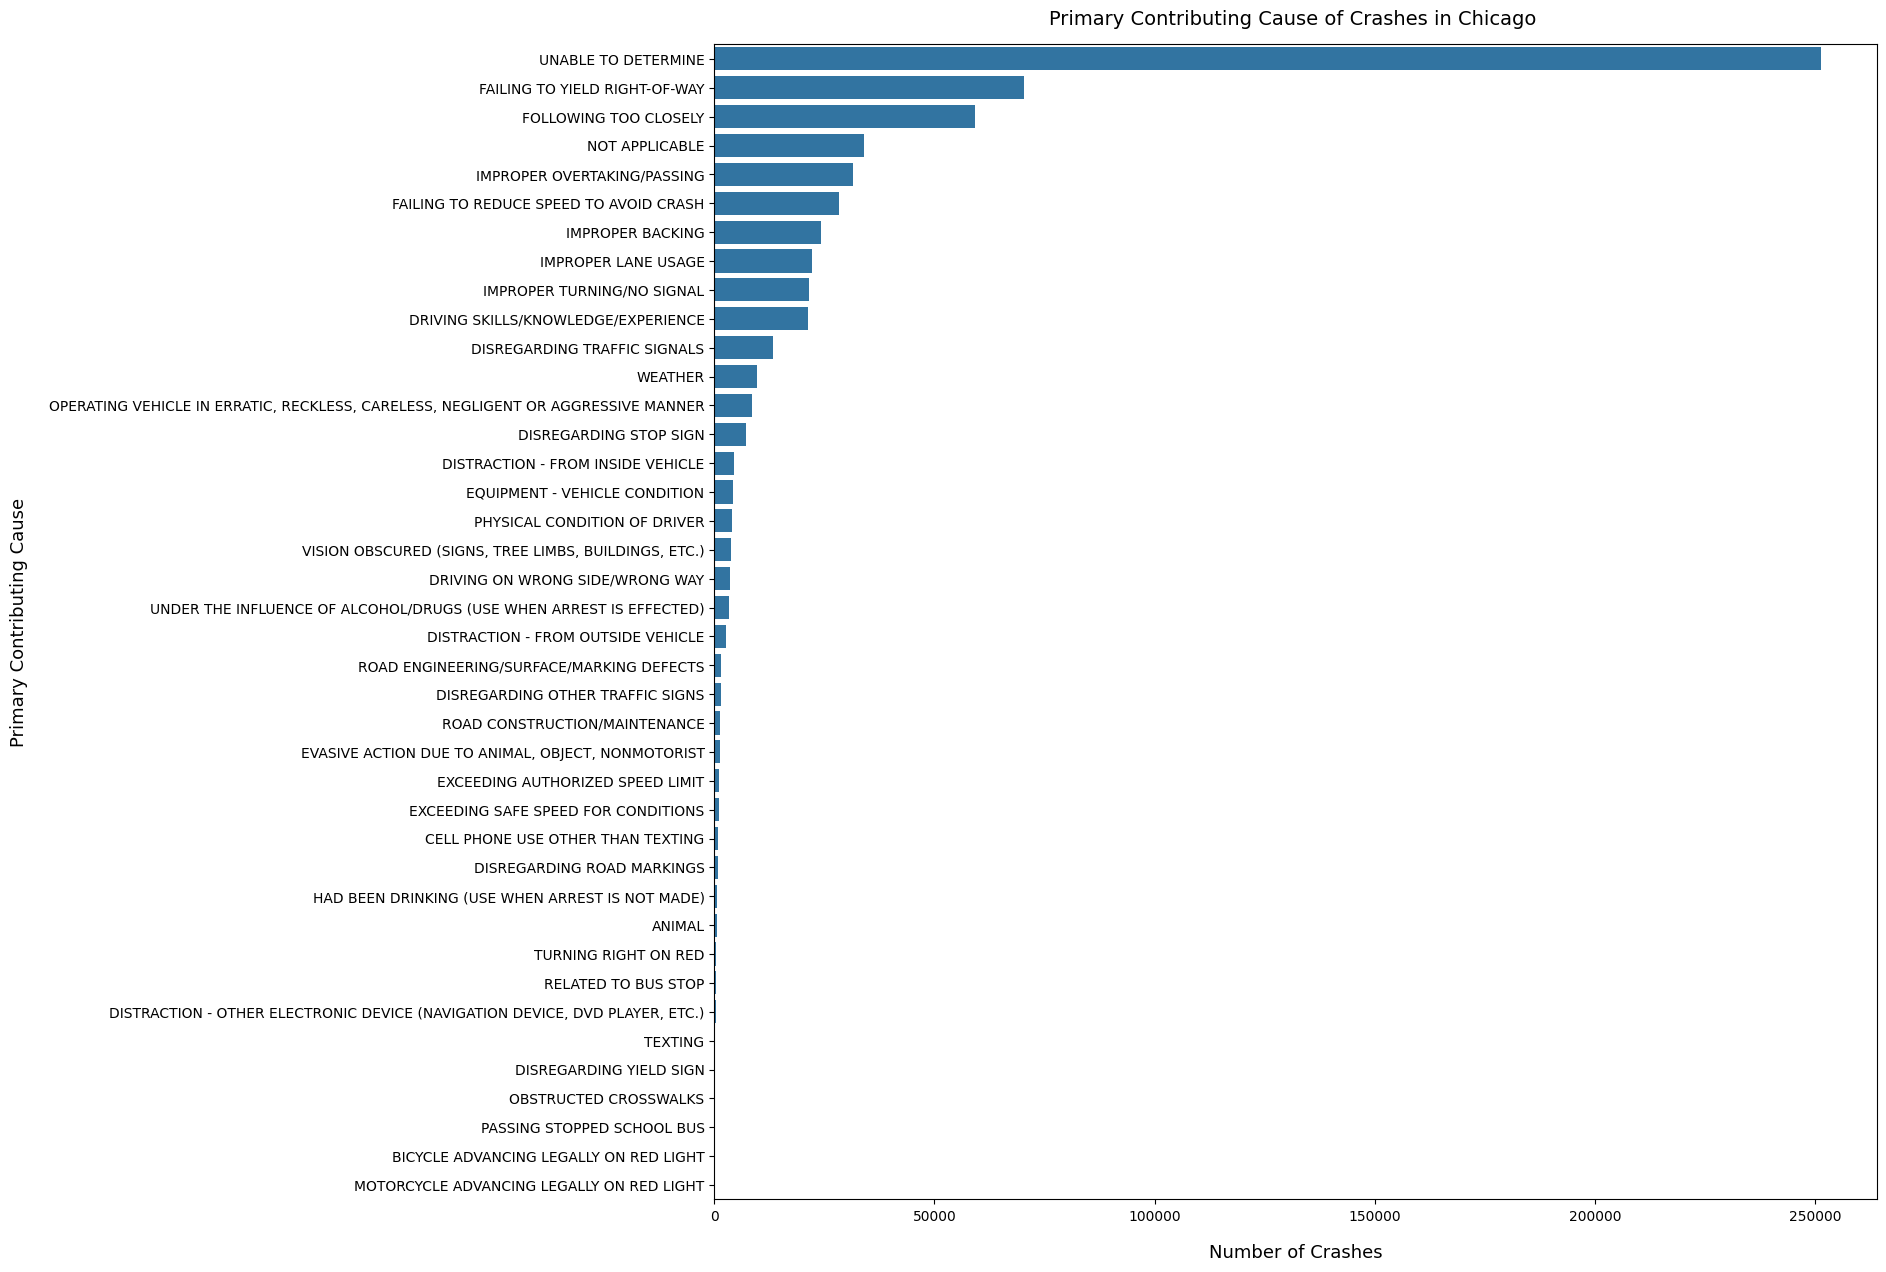

In [23]:
# Display a plot showing the primary contributing cause of reported crashes.
plt.figure(figsize=(15, 15))
sns.countplot(data=df,  y='PRIM_CONTRIBUTORY_CAUSE', order = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title('Primary Contributing Cause of Crashes in Chicago ', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=13, labelpad=15)
plt.show();

In [33]:
# Filter the data to include only crashes with weather data
crashes_with_weather = df[df['WEATHER_CONDITION'] != 'No Information']

# Get the counts of crashes for each weather condition
weather_counts = crashes_with_weather['WEATHER_CONDITION'].value_counts()

# Create the pie chart
fig = px.pie(weather_counts,
             names=weather_counts.index,
             values=weather_counts.values,
             title='Number of Crashes by Weather Condition',
             )

# Show the chart
fig.show()